In [1]:
library("igraph")


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




## Question 2

In [2]:
tickers_sectors <- read.csv(file = 'finance_data/Name_sector.csv',header=TRUE,stringsAsFactors=FALSE)
filenames = paste("finance_data/data", list.files("finance_data/data", pattern="*.csv"), sep="/")

length_data<-c()
i<-1
log_norm_mat = matrix(0,length(filenames)-11,764) #omit files with NaN data
for(j in c(1:length(filenames))){
    df = read.csv(filenames[j],header=TRUE, stringsAsFactors=FALSE)
    length_data[j] = dim(df)[1]
    if(length_data[j]==765){
        p = df[,5] 
        q = c()
        r = c()
        for(k in c(2:length(p))){
            q[k-1] = (p[k]-p[k-1])/p[k-1]
        }
        r = log(1+q)
        log_norm_mat[i,] = r
        i = i+1
    }
}

In [3]:
get_edges<- function(edge_weight_file,log_norm_mat,tickers_sectors){
  cat("Source","\t","Sink","\t","Weight",file=edge_weight_file)
  for(i in c(1:(dim(log_norm_mat)[1]-1))){
    for(j in c((i+1):dim(log_norm_mat)[1])){
      ri <- mean(log_norm_mat[i,]) 
      rj <- mean(log_norm_mat[j,])
      ri2 <- log_norm_mat[i,]^2
      rj2 <- log_norm_mat[j,]^2
      rhoij <- ((mean(log_norm_mat[i,]*log_norm_mat[j,]))-(ri*rj))/(sqrt((mean(ri2)-(ri^2))*(mean(rj2)-(rj^2))))
      wij <- sqrt(2*(1-rhoij))
      cat('\n',tickers_sectors[i,1],'\t',tickers_sectors[j,1],'\t',wij,file=edge_weight_file)
    }
  }
}

In [4]:
tickers_sectors=tickers_sectors[-which(length_data!=765),]
edge_weight_file <- file("finance_data/edge_weights.txt", "w")
get_edges(edge_weight_file,log_norm_mat,tickers_sectors)
close(edge_weight_file)

edge_list= read.delim("finance_data/edge_weights.txt",header=TRUE)
correlation_graph = graph.data.frame(edge_list, directed = FALSE)
E(correlation_graph)$weight = edge_list[,"Weight"]

pdf 
  2

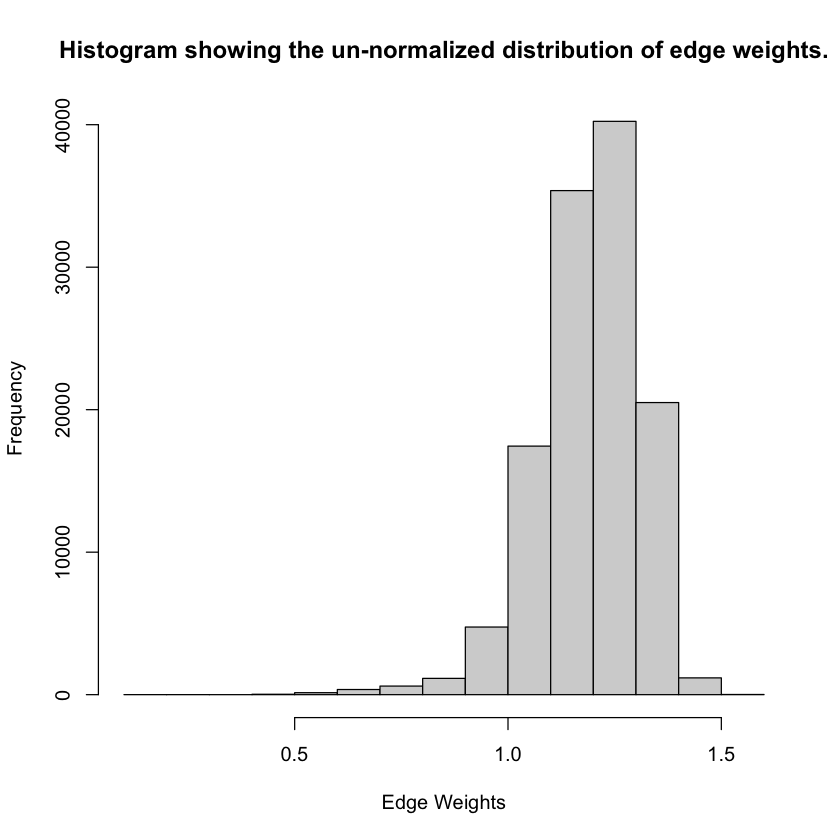

In [5]:
hist(edge_list[,"Weight"],main="Histogram showing the un-normalized distribution of edge weights.",xlab="Edge Weights",ylab="Frequency")
dev.copy2eps(file='Q2.eps')

## Question 3

pdf 
  2

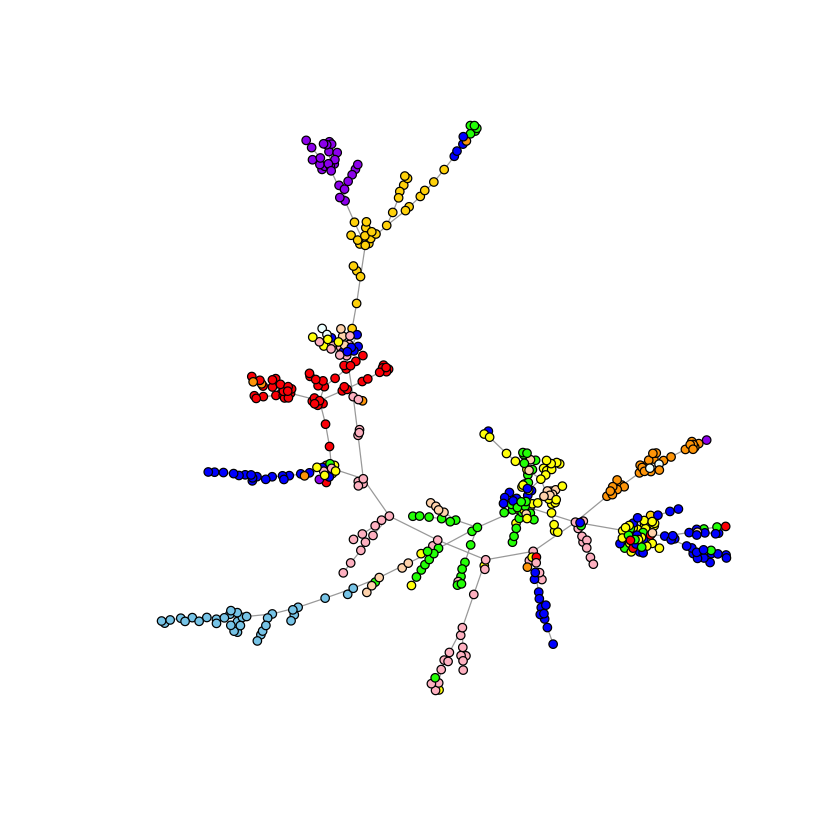

In [6]:
mst <- mst(correlation_graph,algorithm="prim")
sectors = unique(tickers_sectors[,2])

colors <- c()
  for(v in c(1:vcount(correlation_graph))){
    cur_sector <- tickers_sectors[v,2]
    i <- which(sectors==cur_sector)
    colors[v] <- switch(i,"red","green","blue","yellow","orange","purple","pink","gold","peachpuff","skyblue","azure")
}

plot(mst,vertex.size=3, vertex.label=NA, vertex.color=colors)
dev.copy2eps(file='Q3.eps')

## Question 4

In [7]:
Si <- c()
for(i in c(1:length(sectors))){
  Si[i] <- length(which(tickers_sectors[,2]==sectors[i]))
}
p1 <- c()
p2 <- c()
for(v in c(1:vcount(mst))){
  neighbors <- neighbors(mst,v)
  Ni <- length(neighbors)
  Qi<-0
  for(i in neighbors){
    if(tickers_sectors[i,2]==tickers_sectors[v,2])
      Qi<-Qi+1
  }
  p1[v] <- Qi/Ni
  p2[v] <- Si[which(sectors==tickers_sectors[v,2])]/vcount(mst)
}
alpha1 <- sum(p1)/vcount(mst)
alpha2 <- sum(p2)/vcount(mst)
print(sprintf("Values of alpha for the two cases: %f and %f",alpha1,alpha2))

[1] "Values of alpha for the two cases: 0.828930 and 0.114188"


## Question 5

In [8]:
tickers_sectors_week <- read.csv(file = 'finance_data/Name_sector.csv',header=TRUE,stringsAsFactors=FALSE)
filenames_week = paste("finance_data/data", list.files("finance_data/data", pattern="*.csv"), sep="/")

length_data_week<-c()
i<-1
log_norm_mat_week = matrix(0,length(filenames_week)-13,142) #omit files with NaN data
for(j in c(1:length(filenames_week))){
    df = read.csv(filenames_week[j],header=TRUE, stringsAsFactors=FALSE)
    df["Day"]=weekdays(as.Date(df[,1])) 
    df =subset(df, Day=='Monday')
    length_data_week[j] = dim(df)[1]
    if(length_data_week[j]==143){
        p = df[,5] 
        q = c()
        r = c()
        for(k in c(2:length(p))){
            q[k-1] = (p[k]-p[k-1])/p[k-1]
        }
        r = log(1+q)
        log_norm_mat_week[i,] = r
        i = i+1
    }
}

In [9]:
tickers_sectors_week=tickers_sectors_week[-which(length_data_week!=143),]
edge_weight_file_week <- file("finance_data/edge_weights_week.txt", "w")
get_edges(edge_weight_file_week,log_norm_mat_week,tickers_sectors_week)
close(edge_weight_file_week)

edge_list_week= read.delim("finance_data/edge_weights_week.txt",header=TRUE)
correlation_graph_week = graph.data.frame(edge_list_week, directed = FALSE)
E(correlation_graph_week)$weight = edge_list_week[,"Weight"]

pdf 
  2

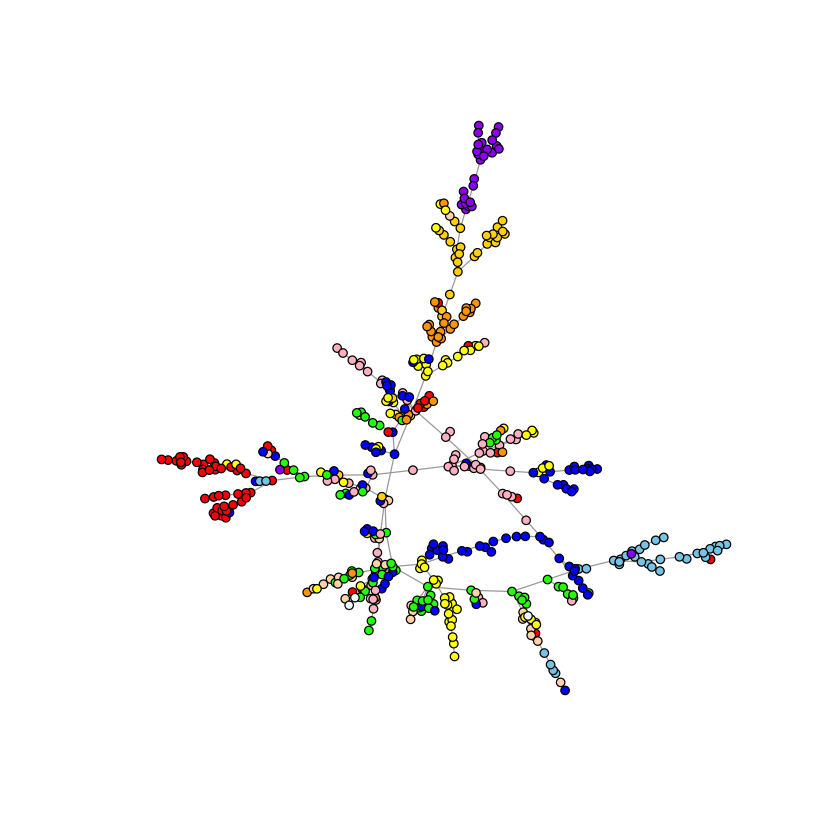

In [14]:
mst_week <- mst(correlation_graph_week,algorithm="prim")
sectors_week = unique(tickers_sectors_week[,2])

colors_week <- c()
  for(v in c(1:vcount(correlation_graph_week))){
    cur_sector <- tickers_sectors_week[v,2]
    i <- which(sectors_week==cur_sector)
    colors_week[v] <- switch(i,"red","green","blue","yellow","orange","purple","pink","gold","peachpuff","skyblue","azure")
}

plot(mst_week,vertex.size=3, vertex.label=NA, vertex.color=colors_week)
dev.copy2eps(file='Q5.eps')